# Lab 8 Genome Assembly

## Command

spades.py --careful -o /home/shaoboyang/Comp-MCB/lab8 

-1 /data/Lab8_data/illumina_reads_R1.fastq 

-2 /data/Lab8_data/illumina_reads_R2.fastq 

--pacbio /data/Lab8_data/pacbio_reads.fastq 

-t 1

# Lab9
## Generate	assembly statistics
### Install assembly-stats program command

#### mkdir build
#### cd build
#### cmake -DINSTALL_DIR:PATH=/foo/bar/ ..
#### make
#### make test
#### make install

#### command:
$ assembly-stats scaffold.fasta

stats for scaffolds.fasta

sum = 6672441, n = 173, ave = 38569.02, largest = 468307

N50 = 261858, n = 10

N60 = 253666, n = 12

N70 = 207869, n = 15

N80 = 124081, n = 20

N90 = 92098, n = 26

N100 = 128, n = 173

N_count = 144

Gaps = 7



$ assembly-stats contigs.fasta

stats for contigs.fasta

sum = 6668871, n = 179, ave = 37256.26, largest = 468307

N50 = 213892, n = 11

N60 = 195508, n = 14

N70 = 148554, n = 18

N80 = 103352, n = 23

N90 = 81820, n = 30

N100 = 128, n = 179

N_count = 0

Gaps = 0



Why	is	N50	is	useful	statistic	to	calculate?	

**From the introduction of wiki, N50 represent the quality of genome assembly. The longer the N50 is, the high quality the assembly will be**

Why	not	just	list	the	mean	or	median	contig	length?	

**Mean or median is easily influenced by many contigs with a very long or short size.**

In	your	assembly,	are	scaffolds	longer	than	contigs,	or	are	scaffolds	approximately	equal	to	
contigs?

**Scaffolds is very slightly longer than contigs, so I recognize them as approximately equal.**



## Extra credit

In [17]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Phylo
from io import StringIO
import matplotlib
import matplotlib.pyplot as plt

In [18]:
contigs = []
for seq in SeqIO.parse("contigs.fasta","fasta"):
    contigs.append(seq)

Extract coverage and contigs name.

In [45]:
time_str = []
na = []
for seq in contigs:
    name = seq.name
    for i in range(len(name)):
        if name[i-1] == '_' and name[i-2] == 'v' and name[i-3] == 'o' and name[i-4] == 'c':
            time_str.append(name[i:len(name)])
            na.append(name)
            break
time = []
for t in time_str:
    time.append(float(t))

times = time

Histogram of coverage of every contigs.

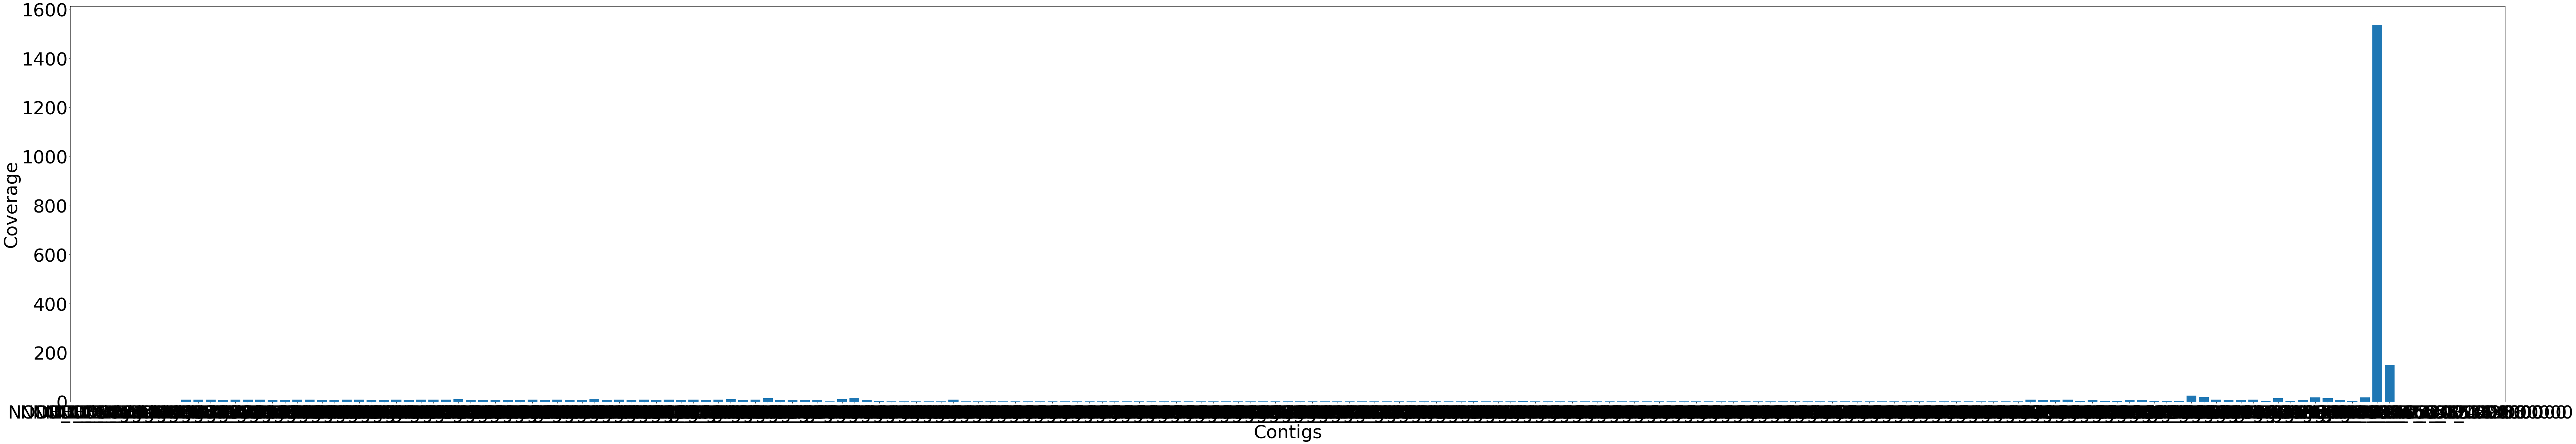

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(120,20))
plt.bar(na, times)
plt.xlabel('Contigs', fontdict={'weight': 'normal', 'size': 50})
plt.ylabel('Coverage', fontdict={'weight': 'normal', 'size': 50})
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

To make plot more lucid, I remove two of the biggest coverage.

In [47]:
time.sort()
times.remove(150.0)
times.remove(1536.0)
na.remove('NODE_179_length_128_cov_150.000000')
na.remove('NODE_178_length_128_cov_1536.000000')

There you go.

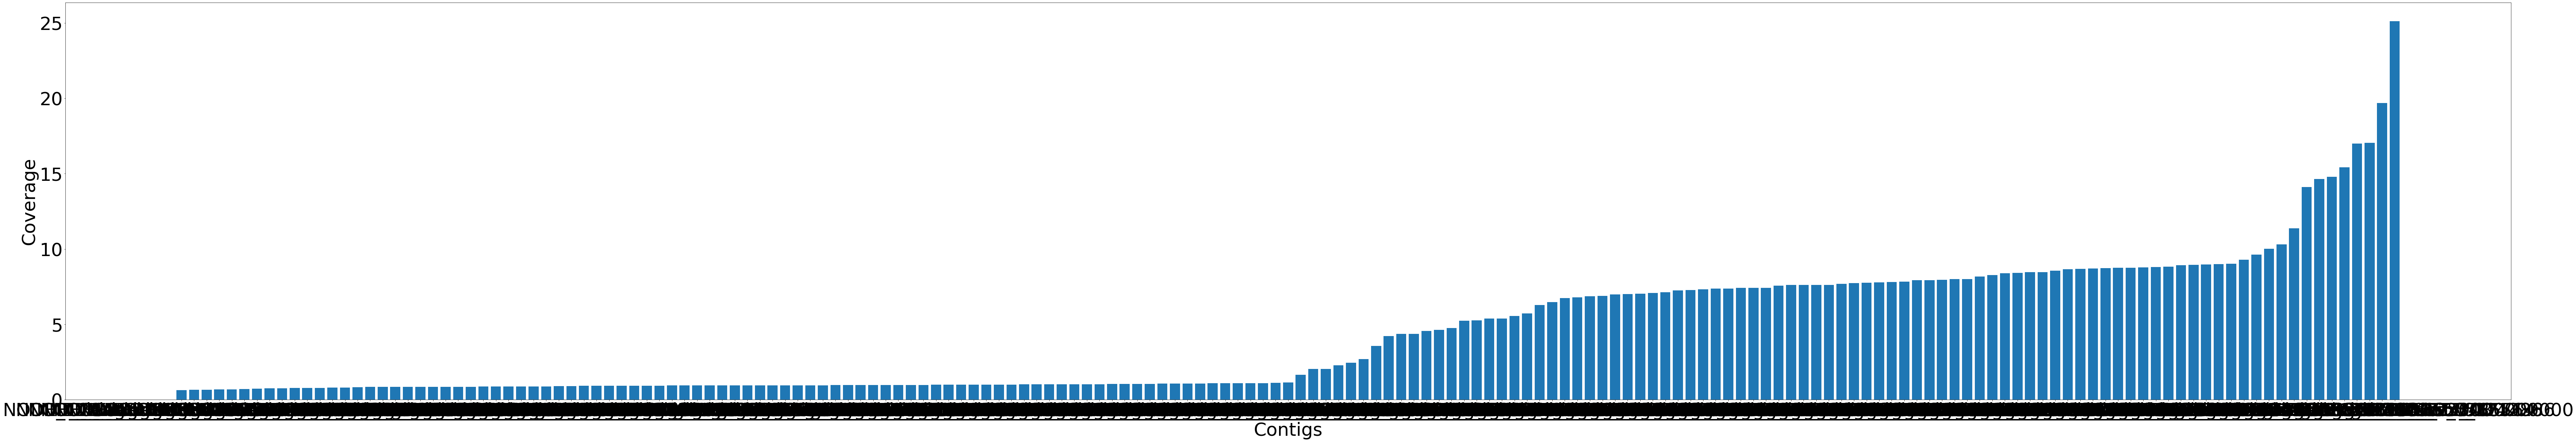

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(120,20))
plt.bar(na, times)
plt.xlabel('Contigs', fontdict={'weight': 'normal', 'size': 50})
plt.ylabel('Coverage', fontdict={'weight': 'normal', 'size': 50})
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.show()

Distrbution of every coverage. Since they don't have too many repition, I roughly split them into 20 ranges. 0-1, 1-2, ...

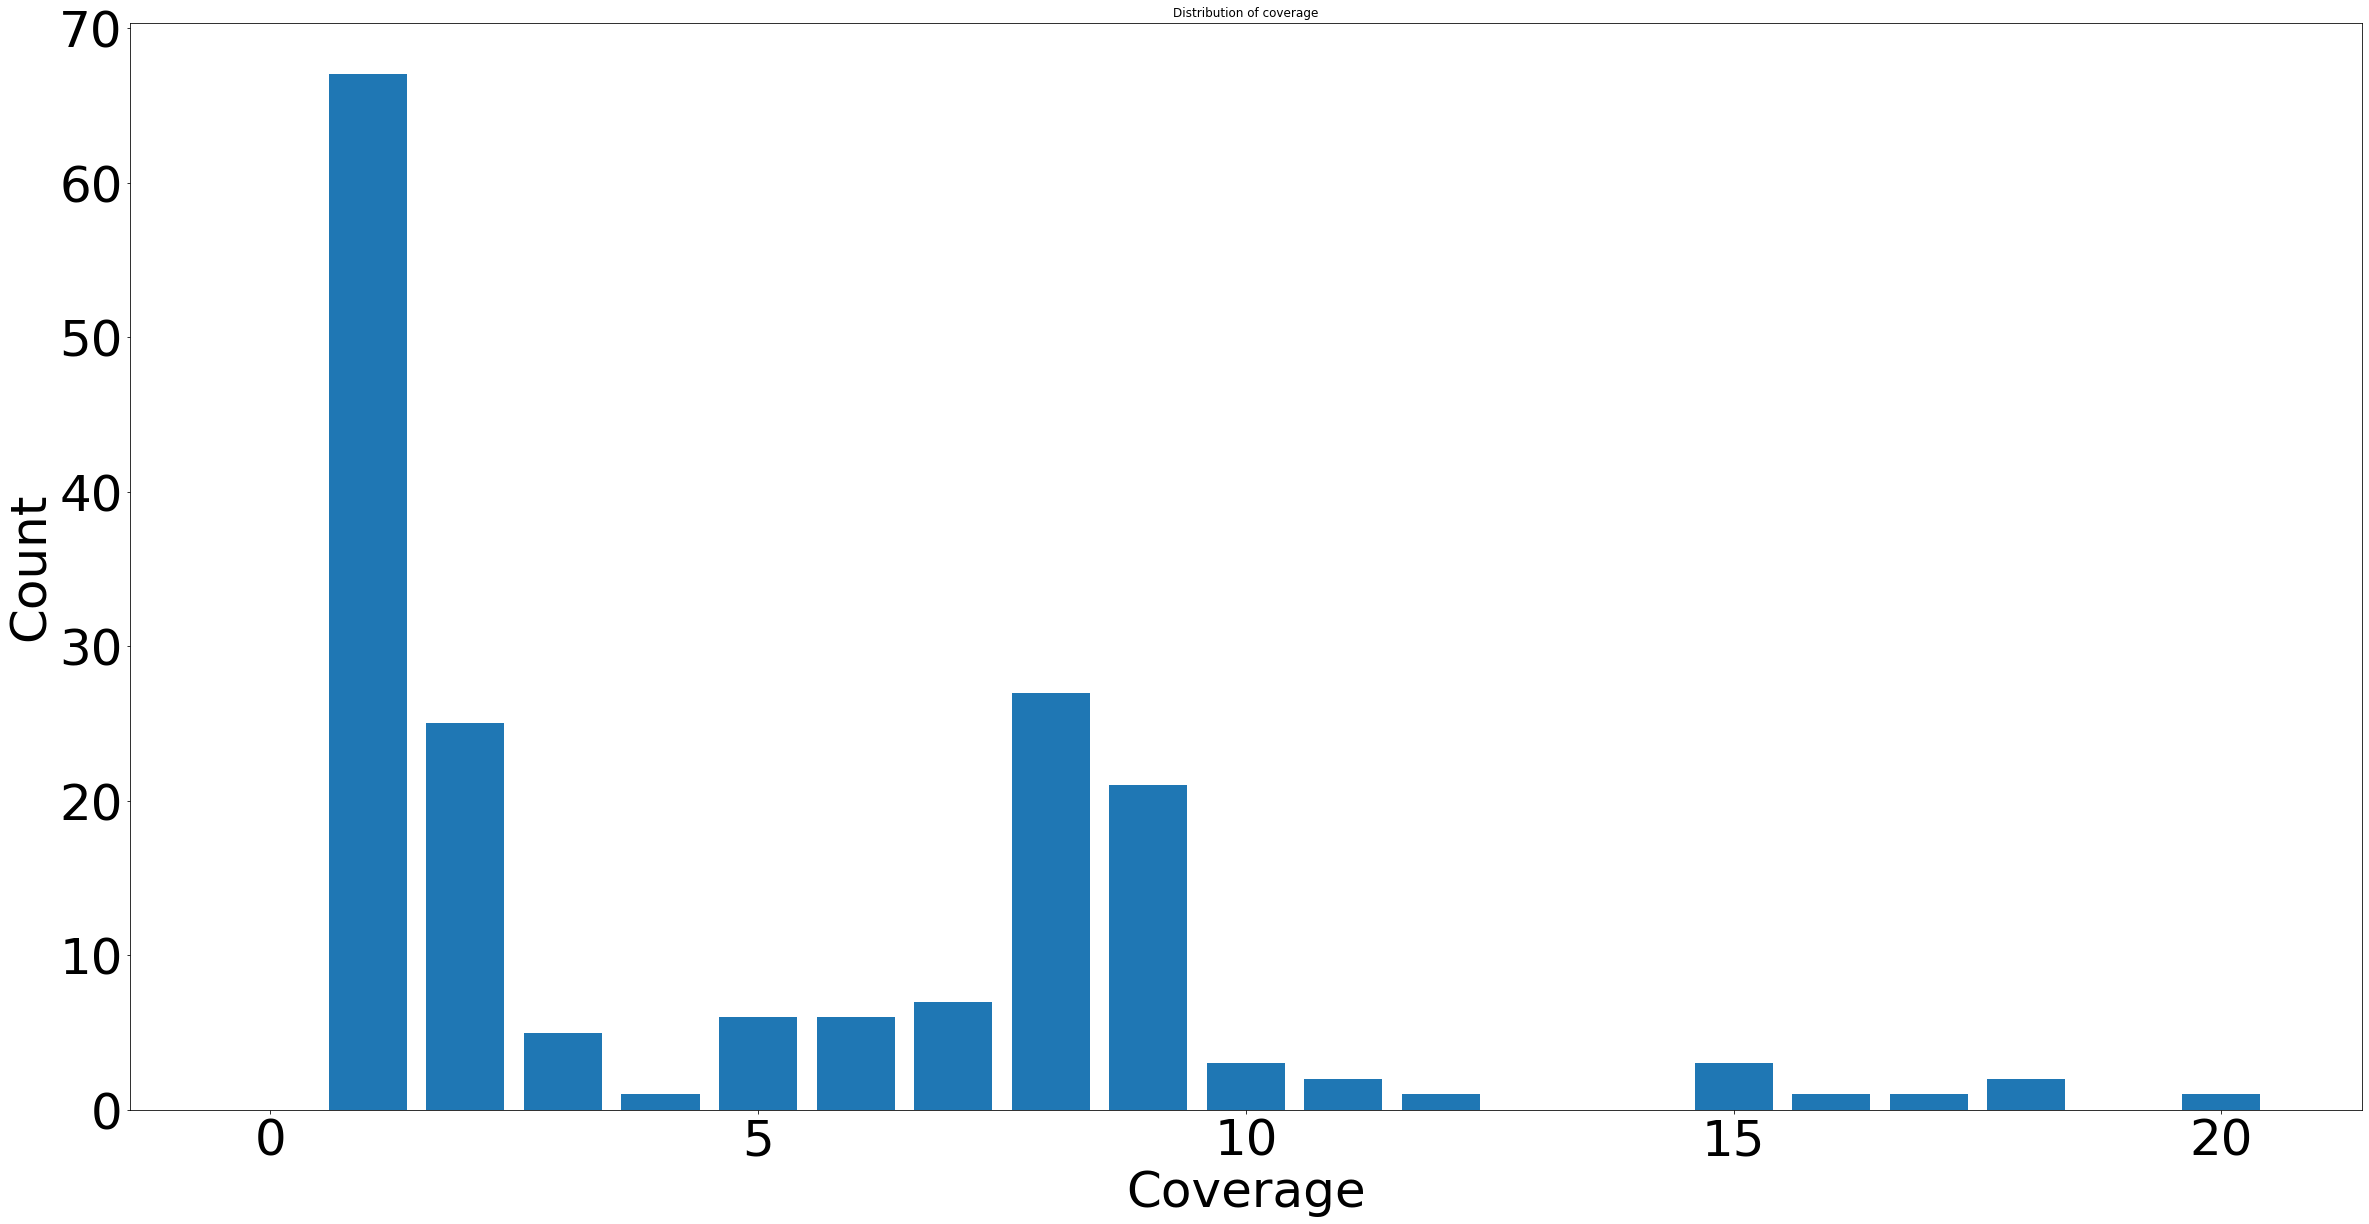

In [14]:
count = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];
num = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in time:
    for j in range(len(num)):
        if i <= num[j] and i >= num[j-1]:
            count[j] = count[j]+1

import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
plt.bar(num, count)
plt.xlabel('Coverage', fontdict={'weight': 'normal', 'size': 50})
plt.ylabel('Count', fontdict={'weight': 'normal', 'size': 50})
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title('Distribution of coverage')
plt.show()
    

Is	coverage	uniformly	distributed?	Does	it	look	Gaussian?	Is	it	bimodal	or	trimodal?

**No. It looks more like gamma distribution.**

## Identify	the	taxon	from	which	your	genome	originated

#### command

rna_hmm3.py -i /home/shaoboyang/Comp-MCB/lab8/contigs.fasta  

-o /home/shaoboyang/Comp-MCB/lab8/output.gff 

-L /data/Lab9_data/HMM3

In [50]:
f = open('output.gff','r')
rrna = []
for i in f:
    print(i)
    rrna.append(i)

##seq_name	method	feature	start	end	evalue	strand	frame	attribute

NODE_3_length_352739_cov_8.419214	rna_hmm3	rRNA	65159	68063	0	-	NA	23S_rRNA

NODE_23_length_103352_cov_10.011827	rna_hmm3	rRNA	37580	40484	0	+	NA	23S_rRNA

NODE_6_length_279343_cov_8.754747	rna_hmm3	rRNA	457	3361	0	+	NA	23S_rRNA

NODE_1_length_468307_cov_8.955035	rna_hmm3	rRNA	161099	164003	0	+	NA	23S_rRNA

NODE_117_length_451_cov_1.006173	rna_hmm3	rRNA	184	303	8e-36	+	NA	23S_rRNA

NODE_117_length_451_cov_1.006173	rna_hmm3	rRNA	152	220	4.4e-09	-	NA	23S_rRNA

NODE_14_length_195508_cov_8.764542	rna_hmm3	rRNA	49	1592	0	-	NA	16S_rRNA

NODE_1_length_468307_cov_8.955035	rna_hmm3	rRNA	159050	160594	0	+	NA	16S_rRNA

NODE_3_length_352739_cov_8.419214	rna_hmm3	rRNA	68568	70112	0	-	NA	16S_rRNA

NODE_34_length_47877_cov_11.378513	rna_hmm3	rRNA	46286	47829	0	+	NA	16S_rRNA

NODE_23_length_103352_cov_10.011827	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA

NODE_23_length_103352_cov_10.011827	rna_hmm3	rRNA	40649	40763	3.5e-21	+	NA	5S_rRNA


In [7]:
n = []
for i in rrna:
    if i[0] != '#':
        for j in range(len(i)):
            if i[j] == '\t' and i[j+1] == 'r' and i[j+2] == 'n' and i[j+3] == 'a':
                n.append(i[0:j])
                break
print(n)

['NODE_3_length_352739_cov_8.419214', 'NODE_23_length_103352_cov_10.011827', 'NODE_6_length_279343_cov_8.754747', 'NODE_1_length_468307_cov_8.955035', 'NODE_117_length_451_cov_1.006173', 'NODE_117_length_451_cov_1.006173', 'NODE_14_length_195508_cov_8.764542', 'NODE_1_length_468307_cov_8.955035', 'NODE_3_length_352739_cov_8.419214', 'NODE_34_length_47877_cov_11.378513', 'NODE_23_length_103352_cov_10.011827', 'NODE_23_length_103352_cov_10.011827', 'NODE_21_length_133461_cov_8.643403', 'NODE_6_length_279343_cov_8.754747', 'NODE_3_length_352739_cov_8.419214', 'NODE_42_length_25337_cov_8.961166', 'NODE_1_length_468307_cov_8.955035']


In [8]:
seq_rec = []
for i in contigs:
    for j in n:
        if i.name == j:
            seq_rec.append(i)

In [9]:
SeqIO.write(seq_rec, open("rRNA.fasta", "w"), "fasta")

17

### Command:
bedtools getfasta -fi /home/shaoboyang/Comp-MCB/lab8/rRNA.fasta -bed /home/shaoboyang/Comp-MCB/lab8/output.gff

#### Result

 domain Bacteria  (5)
          phylum "Proteobacteria"  (5)
             class Gammaproteobacteria  (5)
                order Pseudomonadales  (5)
                   family Pseudomonadaceae  (5)
                      genus Pseudomonas  (5)

**Pseudomonas**

The 16srRNA of assembly genome matches most of the Pseudomonas.

In [10]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://localhost:9993/tree/Comp-MCB/lab8/lab9_1.jpg")

In [11]:
Image(url= "http://localhost:9993/tree/Comp-MCB/lab8/lab9.jpg")

## Research and write-up

##  Multidrug and Heavy Metal Resistance Potential of Assembled Genome
    The various resistance mechanism makes microorganism able to live in different and severe environment like the one with high concentration of antibiotic, heavy metal and high temperature. These gene-driven mechanism make microorganism utilize the carbon source, outperform competitors and survive in the drastic change of environment. Generally speaking, the resistance potential is recorded in the genome of one species. By analyzing the genome, we can predict the ability of resistance of certain species. Inspired by this idea, this writing uses the annotation of genome belonging to one unknown species from RAST to predict its potential resistance. The prediction contains two parts. In the first part, resistance ability will be predicted referring to one closet neighbor. In the second part, by analyzing a certain group of genes, which could have resistances to antibiotics and toxic compounds, the certain resistance can be predicted and the relationship between this unknown species and its closet neighbor can be seen.

    The results of RAST shows that the closet of neighbor is _Pseudomonas aeruginosa_. As the opportunistic pathogen, Pseudomonas aeruginosa represents various resistance to current antibiotics including aminoglycosides, quinolones and β-lactams. Pseudomonas aeruginosa resistance the mainly contains three major categories: intrinsic, acquired and adaptive resistance. Intrinsic, major resistance, mainly consists two types. Pseudomonas aeruginosa uses cell membrane to prevent some antibiotics such as aminoglycoside family, quinolone and β-lactam from permeating into the cell. A group of protein such as OprB, OprD, OprE, OprO, OprP and so on is mainly responsible for the outer membrane permeability. And also, efflux pumps also plays important roles in resistance. Efflux pumps system contains cytoplasmic membrane transporters, periplasmic linker proteins and outer membrane porin channel proteins. Specific proteins like MexAB-OprM, MexCD-OprJ, MexEF-OprN, and MexXY-OprM are able to pump specific antibiotics out of cell1. Besides, the antibiotic inactivating enzymes expressed by cells also can degrade most of antibiotics efficiently. From traits of the closest neighbor, the unknown species should reflect the various resistance to antibiotics.

    However, the annotation of the assembled genome tells different stories basically. Using the annotation results of RAST server, the unknown bacterium has one gene FosA to resist fosfomycin. The reference didn’t mention that Pseudomonas aeruginosa have the mechanism to resist fosfomycin. Besides annotations also shows that multidrug resistance transporter Bcr/CflA family exists as an additional way of resistance which could have the potential to resist bicyclomycin, chloramphenicol, florfenicol and chloramphenicol2. It seems that the unknown species doesn’t have as much genes to resist antibiotics as ones that Pseudomonas aeruginosa have. Except for the resistance to the antibiotics, the unknown species tends to have more ability to resist heavy medal. Apparently, it contains many mechanisms to resist copper and also single mechanism to resist other heavy medal like cobalt, zinc and cadmium. Utilizing CopBCD and HmrR, the unknown species may have potential to survive in environment with high concentration of copper.

    To sum up, the unknown species may be the relative of Pseudomonas aeruginosa but live in the environment with high concentration of heavy medal like copper. 

**Reference**

[1] Pang, Z.; Raudonis, R.; Glick, B.R.; Lin, T.J.; Cheng, Z. Antibiotic resistance in Pseudomonas aeruginosa: Mechanisms and alternative therapeutic strategies. Biotechnol. Adv. 2019, 37, 177–192.

[2]Vanina García, Godoy P , Daniels C , et al. Functional analysis of new transporters involved in stress tolerance in Pseudomonas putida DOT-T1E[J]. Environmental Microbiology Reports, 2010, 2(3):389-395.
